In [ ]:
%pip install -q pandas matplotlib scipy
%matplotlib inline

Note: you may need to restart the kernel to use updated packages.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

ticks_million = ticker.FuncFormatter(lambda x, pos: '{0:g}'.format(x/1e6))
ticks_comma = ticker.StrMethodFormatter('{x:,.0f}')

pd.options.display.max_rows = 999

COLOR_GO=(74/255, 171/255, 211/255)
COLOR_RUST=(229/255,89/255,40/255)
COLOR_UNSAFE=(132/255,41/255,35/255)

BAR_COLORS=[COLOR_GO,COLOR_RUST]

comp = pd.read_csv('bbolt_comp.csv')

In [ ]:
comp.head()

,runtime,write_alg,read_alg,count,batch,write_ops/s,read_ops/s
0,release,seq,seq,100000,5000,92601,50000000
1,release,seq,seq,100000,5000,93405,55555555
2,release,seq,seq,100000,5000,90073,55555555
3,release,seq,seq,100000,5000,93510,55555555
4,release,seq,seq,100000,5000,89863,55555555


In [ ]:
runtimes = comp[comp.runtime.isin(["release","go","unsafe"])]

c100k = runtimes[runtimes['count']==100000]
c1m = runtimes[runtimes['count']==1000000]

In [ ]:
c100k.groupby(["write_alg","runtime","batch"])["write_ops/s"].mean()

write_alg  runtime  batch 
rnd        go       5000       60004.9
                    10000     102986.8
                    25000      95001.4
                    50000      23828.9
                    100000      5593.9
           release  5000       65029.7
                    10000     111398.8
                    25000     123990.8
                    50000      56151.4
                    100000     15934.8
           unsafe   5000       64806.0
                    10000     113627.6
                    25000     122978.6
                    50000      56102.7
                    100000     16012.5
rnd-nest   go       5000       75929.8
                    10000      86954.2
                    25000      39601.0
                    50000      13622.2
                    100000      5961.0
           release  5000       78141.2
                    10000      91586.3
                    25000      57079.1
                    50000      31093.5
                    100000     16061.

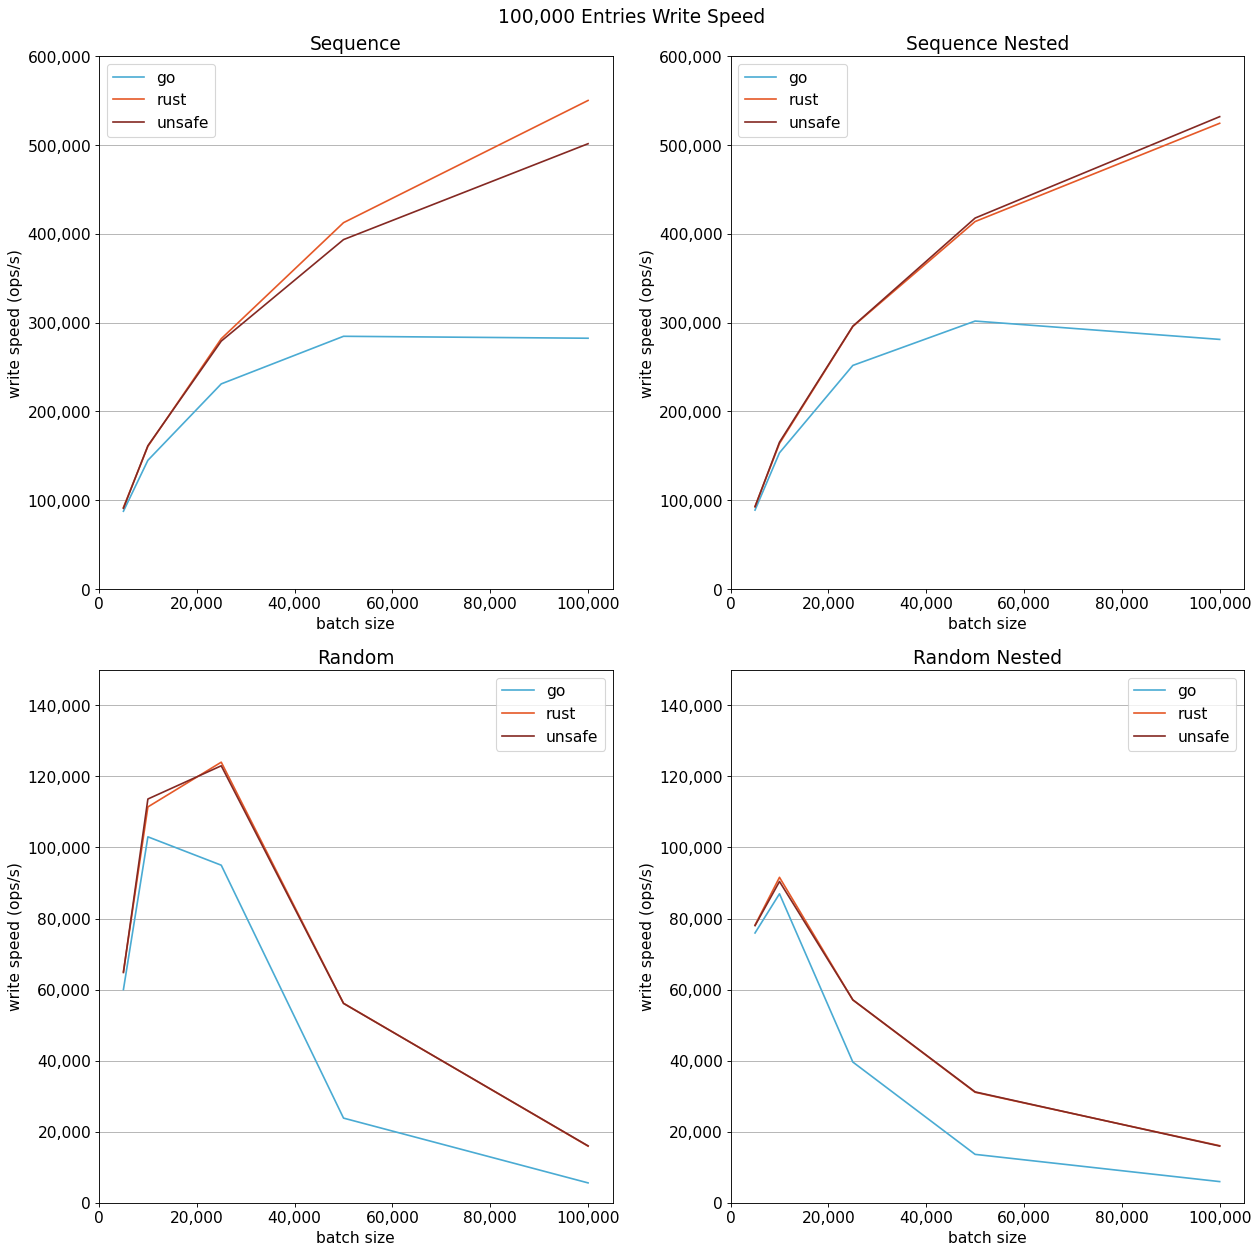

In [ ]:
plt.rcParams["font.size"] = "14"
fig = plt.figure(figsize=(16,16), dpi=80)
fig.suptitle('100,000 Entries Write Speed')
ax = fig.add_subplot(221)
grouped=c100k[c100k['write_alg']=='seq'].groupby(["runtime","batch"])["write_ops/s"].mean()
grouped['go'].plot(label='go',color=COLOR_GO)
grouped['release'].plot(label='rust',color=COLOR_RUST)
grouped['unsafe'].plot(label='unsafe',color=COLOR_UNSAFE)
plt.ylabel('write speed (ops/s)')
plt.xlabel('batch size')
plt.title('Sequence')
plt.legend()
ax.grid(axis='y')
ax.set_ylim([0,600000])
ax.yaxis.set_major_formatter(ticks_comma)
ax.set_xlim([0,105000])
ax.xaxis.set_major_formatter(ticks_comma)
ax = fig.add_subplot(222)
grouped=c100k[c100k['write_alg']=='seq-nest'].groupby(["runtime","batch"])["write_ops/s"].mean()
grouped['go'].plot(label='go',color=COLOR_GO)
grouped['release'].plot(label='rust',color=COLOR_RUST)
grouped['unsafe'].plot(label='unsafe',color=COLOR_UNSAFE)
plt.ylabel('write speed (ops/s)')
plt.xlabel('batch size')
plt.title('Sequence Nested')
plt.legend()
ax.grid(axis='y')
ax.set_ylim([0,600000])
ax.yaxis.set_major_formatter(ticks_comma)
ax.set_xlim([0,105000])
ax.xaxis.set_major_formatter(ticks_comma)
ax = fig.add_subplot(223)
grouped=c100k[c100k['write_alg']=='rnd'].groupby(["runtime","batch"])["write_ops/s"].mean()
grouped['go'].plot(label='go',color=COLOR_GO)
grouped['release'].plot(label='rust',color=COLOR_RUST)
grouped['unsafe'].plot(label='unsafe',color=COLOR_UNSAFE)
plt.ylabel('write speed (ops/s)')
plt.xlabel('batch size')
plt.title('Random')
plt.legend()
ax.grid(axis='y')
ax.set_ylim([0,150000])
ax.yaxis.set_major_formatter(ticks_comma)
ax.set_xlim([0,105000])
ax.xaxis.set_major_formatter(ticks_comma)
ax = fig.add_subplot(224)
grouped=c100k[c100k['write_alg']=='rnd-nest'].groupby(["runtime","batch"])["write_ops/s"].mean()
grouped['go'].plot(label='go',color=COLOR_GO)
grouped['release'].plot(label='rust',color=COLOR_RUST)
grouped['unsafe'].plot(label='unsafe',color=COLOR_UNSAFE)
plt.ylabel('write speed (ops/s)')
plt.xlabel('batch size')
plt.title('Random Nested')
plt.legend()
ax.grid(axis='y')
ax.set_ylim([0,150000])
ax.yaxis.set_major_formatter(ticks_comma)
ax.set_xlim([0,105000])
ax.xaxis.set_major_formatter(ticks_comma)
fig.tight_layout()
plt.show()

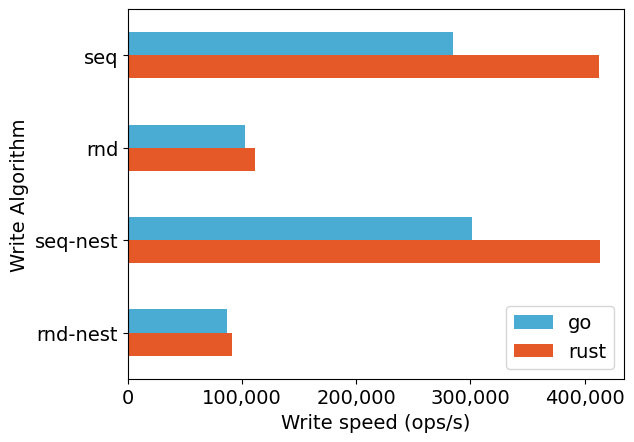

In [ ]:
alg = list()
batch_size = list()
release = list()
go = list()

for write_alg in set(c100k['write_alg']):
    g=c100k[c100k['write_alg']==write_alg].groupby(["runtime","batch"])["write_ops/s"].mean()
    maxed=g['go'].idxmax()
    alg.append(write_alg)
    batch_size.append(maxed)
    release.append(g['release'][maxed])
    go.append(g['go'][maxed])

d = {
    'write_alg': alg,
    'go': go,
    'rust': release,
}
ax = pd.DataFrame(data=d).plot.barh(x='write_alg',color=[COLOR_GO,COLOR_RUST])
ax.xaxis.set_major_formatter(ticks_comma)
ax.invert_yaxis()
ax.set_xlabel('Write speed (ops/s)')
ax.set_ylabel('Write Algorithm')
plt.show()

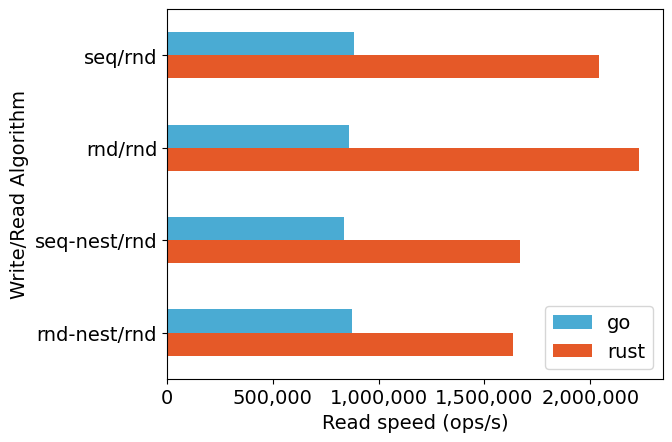

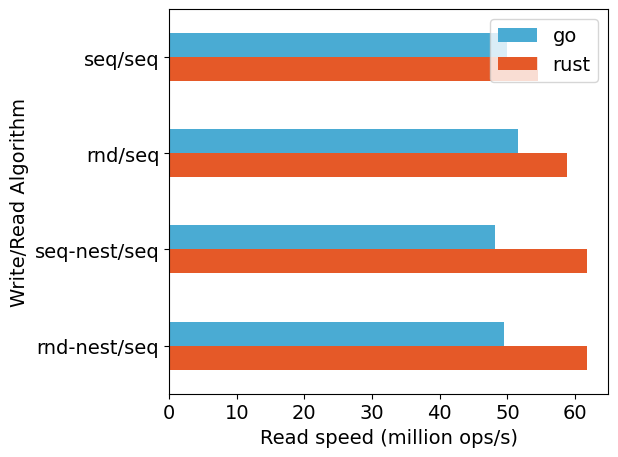

In [ ]:
alg = list()
batch_size = list()
release = list()
go = list()

for write_alg in set(c100k['write_alg']):
    for read_alg in set(c100k['read_alg']):
        g=c100k[c100k['write_alg']==write_alg].groupby(["read_alg","runtime","batch"])["read_ops/s"].mean()
        r = maxed=g[read_alg]
        maxed=r['go'].idxmax()
        alg.append(write_alg + '/' + read_alg)
        batch_size.append(maxed)
        release.append(r['release'][maxed])
        go.append(r['go'][maxed])

d = {
    'alg': alg,
    'go': go,
    'rust': release,
}
pd_rnd=pd.DataFrame(data=d)
ax = pd_rnd[pd_rnd['alg'].str.endswith('rnd')].plot.barh(x='alg',color=[COLOR_GO,COLOR_RUST])
ax.xaxis.set_major_formatter(ticks_comma)
ax.invert_yaxis()
ax.set_xlabel('Read speed (ops/s)')
ax.set_ylabel('Write/Read Algorithm')
ax = pd_rnd[pd_rnd['alg'].str.endswith('seq')].plot.barh(x='alg',color=[COLOR_GO,COLOR_RUST])
ax.xaxis.set_major_formatter(ticks_million)
ax.invert_yaxis()
ax.set_xlabel('Read speed (million ops/s)')
ax.set_ylabel('Write/Read Algorithm')
plt.tight_layout()
plt.show()

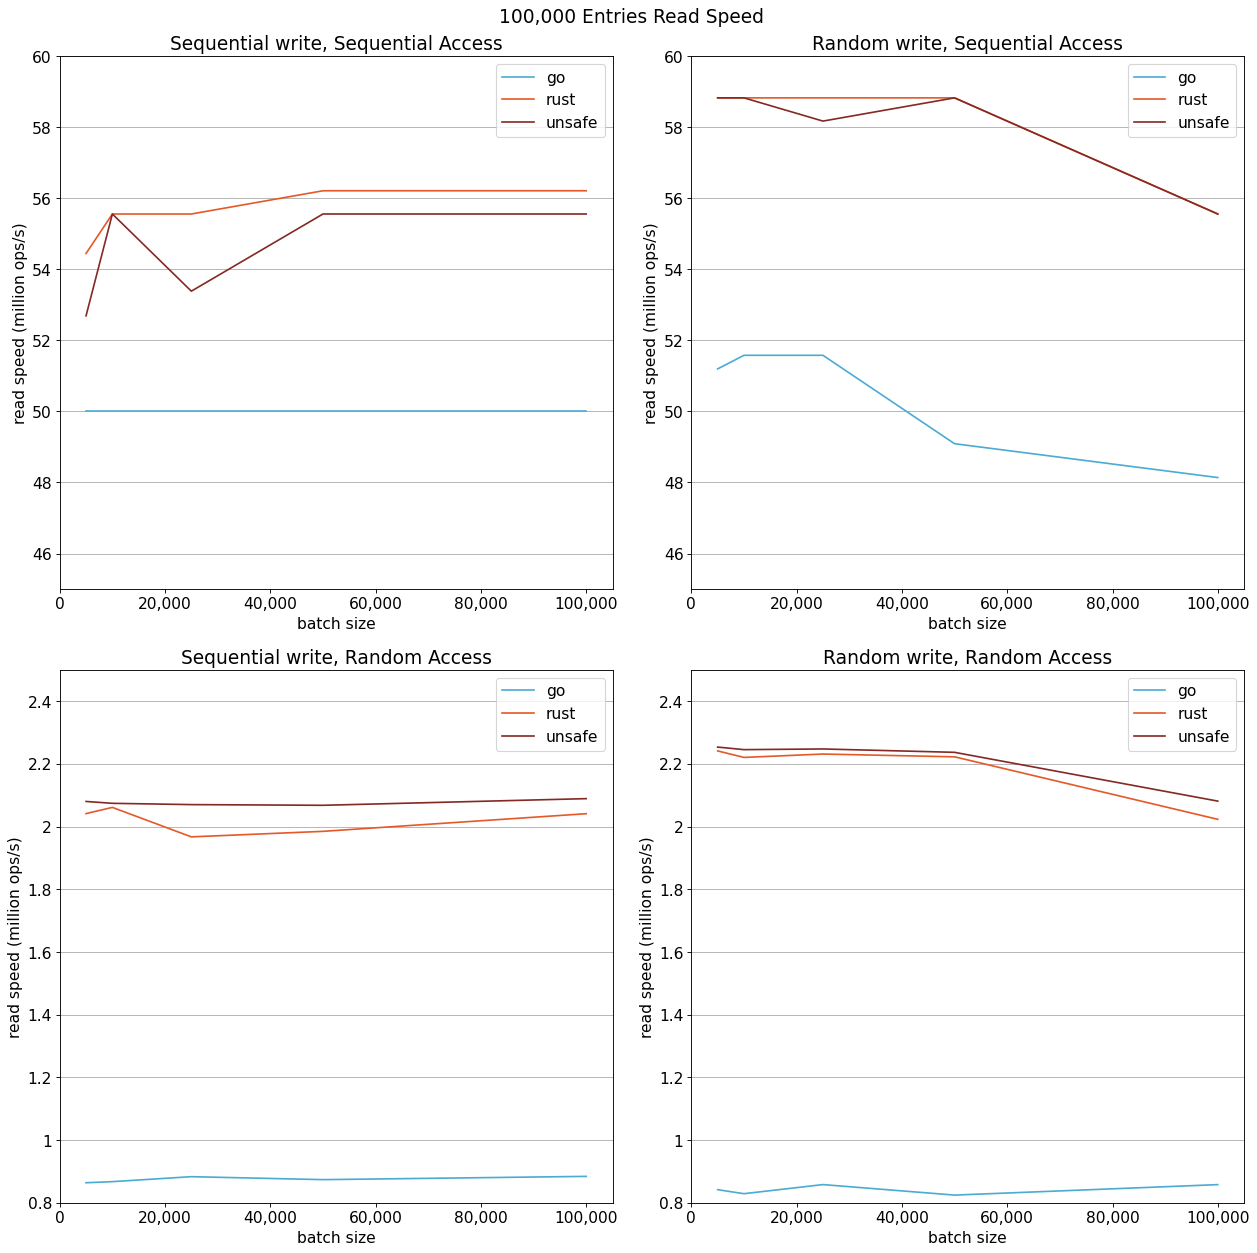

In [ ]:
groups=c100k.groupby(["write_alg","read_alg","runtime","batch"])["read_ops/s"].mean()
plt.rcParams["font.size"] = "14"
fig = plt.figure(figsize=(16,16), dpi=80)
fig.suptitle('100,000 Entries Read Speed')
ax = fig.add_subplot(221)
grouped=groups['seq']['seq']
grouped['go'].plot(label='go',color=COLOR_GO)
grouped['release'].plot(label='rust',color=COLOR_RUST)
grouped['unsafe'].plot(label='unsafe',color=COLOR_UNSAFE)
plt.ylabel('read speed (million ops/s)')
plt.xlabel('batch size')
plt.title('Sequential write, Sequential Access')
plt.legend()
ax.grid(axis='y')
ax.yaxis.set_major_formatter(ticks_million)
ax.set_ylim([45000000,60000000])
ax.xaxis.set_major_formatter(ticks_comma)
ax.set_xlim([0,105000])
ax = fig.add_subplot(222)
grouped=groups['rnd']['seq']
grouped['go'].plot(label='go',color=COLOR_GO)
grouped['release'].plot(label='rust',color=COLOR_RUST)
grouped['unsafe'].plot(label='unsafe',color=COLOR_UNSAFE)
plt.ylabel('read speed (million ops/s)')
ax.ticklabel_format(axis='y', style='plain')
plt.xlabel('batch size')
plt.title('Random write, Sequential Access')
plt.legend()
ax.grid(axis='y') 
ax.yaxis.set_major_formatter(ticks_million)
ax.set_ylim([45000000,60000000])
ax.xaxis.set_major_formatter(ticks_comma)
ax.set_xlim([0,105000])
ax = fig.add_subplot(223)
grouped=groups['seq']['rnd']
grouped['go'].plot(label='go',color=COLOR_GO)
grouped['release'].plot(label='rust',color=COLOR_RUST)
grouped['unsafe'].plot(label='unsafe',color=COLOR_UNSAFE)
plt.ylabel('read speed (million ops/s)')
ax.ticklabel_format(axis='y', style='plain')
plt.xlabel('batch size')
plt.title('Sequential write, Random Access')
plt.legend()
ax.grid(axis='y')
ax.yaxis.set_major_formatter(ticks_million)
ax.set_ylim([800000,2500000])
ax.xaxis.set_major_formatter(ticks_comma)
ax.set_xlim([0,105000])
ax = fig.add_subplot(224)
grouped=groups['rnd']['rnd']
grouped['go'].plot(label='go',color=COLOR_GO)
grouped['release'].plot(label='rust',color=COLOR_RUST)
grouped['unsafe'].plot(label='unsafe',color=COLOR_UNSAFE)
plt.ylabel('read speed (million ops/s)')
plt.xlabel('batch size')
plt.title('Random write, Random Access')
plt.legend()
ax.grid(axis='y')
ax.yaxis.set_major_formatter(ticks_million)
ax.set_ylim([800000,2500000])
ax.xaxis.set_major_formatter(ticks_comma)
ax.set_xlim([0,105000])
fig.tight_layout()
plt.show()

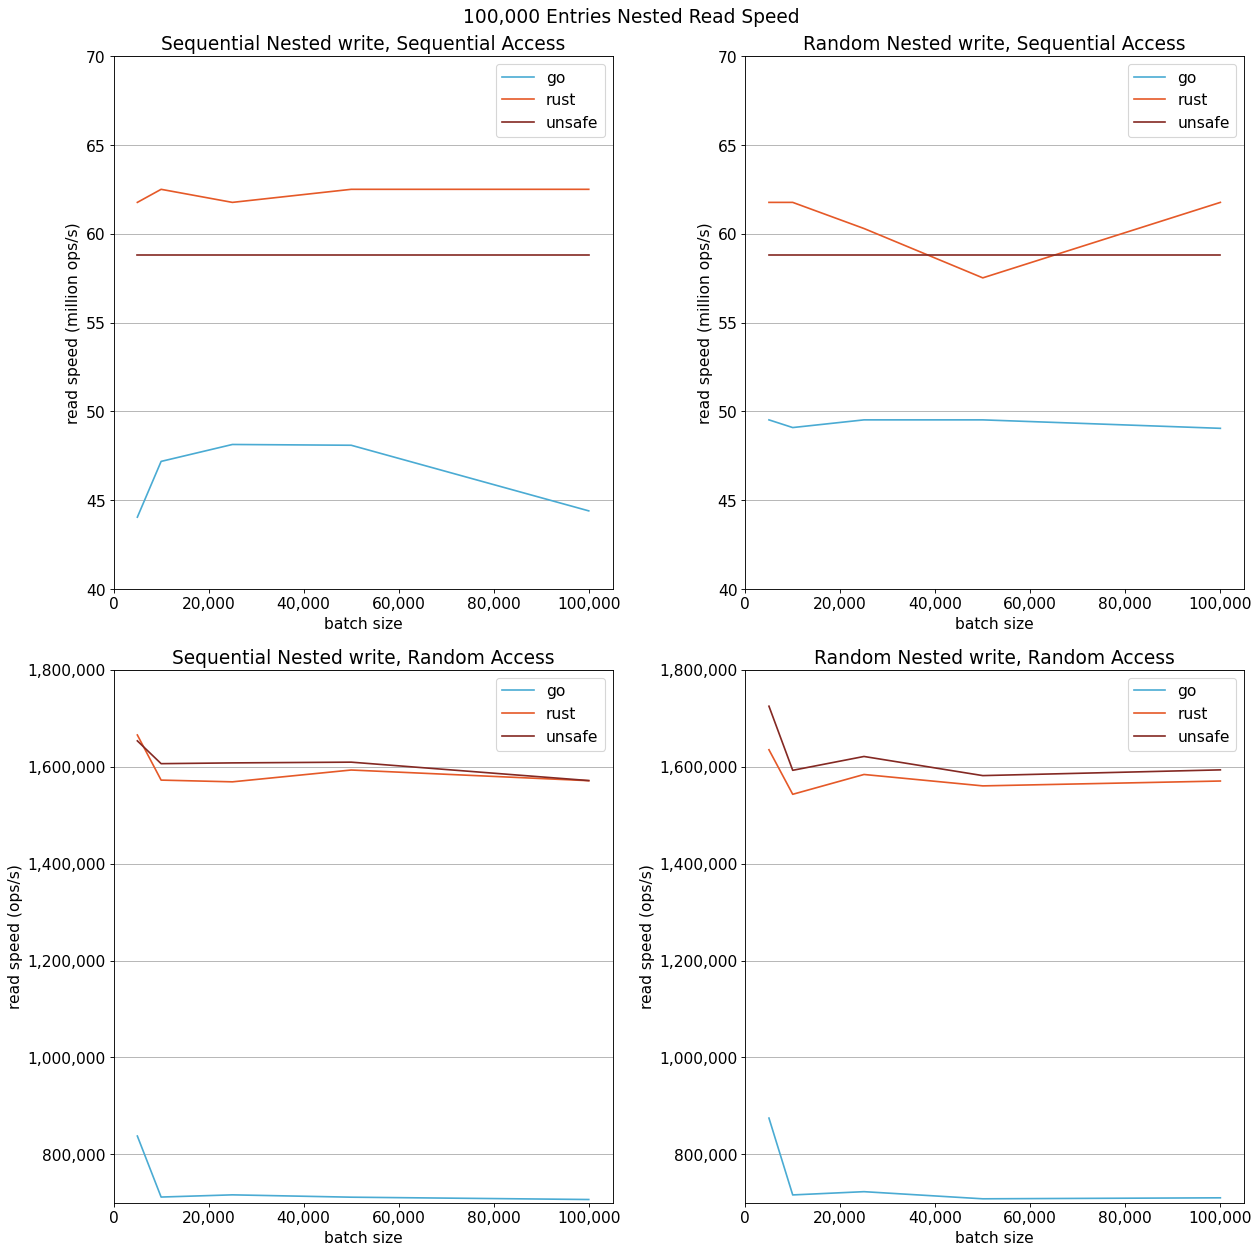

In [ ]:
groups=c100k.groupby(["write_alg","read_alg","runtime","batch"])["read_ops/s"].mean()
plt.rcParams["font.size"] = "14"
fig = plt.figure(figsize=(16,16), dpi=80)
fig.suptitle('100,000 Entries Nested Read Speed')
ax = fig.add_subplot(221)
grouped=groups['seq-nest']['seq']
grouped['go'].plot(label='go',color=COLOR_GO)
grouped['release'].plot(label='rust',color=COLOR_RUST)
grouped['unsafe'].plot(label='unsafe',color=COLOR_UNSAFE)
plt.ylabel('read speed (million ops/s)')
plt.xlabel('batch size')
plt.title('Sequential Nested write, Sequential Access')
plt.legend()
ax.grid(axis='y')
ax.yaxis.set_major_formatter(ticks_million)
ax.set_ylim([40000000,70000000])
ax.xaxis.set_major_formatter(ticks_comma)
ax.set_xlim([0,105000])
ax = fig.add_subplot(222)
grouped=groups['rnd-nest']['seq']
grouped['go'].plot(label='go',color=COLOR_GO)
grouped['release'].plot(label='rust',color=COLOR_RUST)
grouped['unsafe'].plot(label='unsafe',color=COLOR_UNSAFE)
plt.ylabel('read speed (million ops/s)')
plt.xlabel('batch size')
plt.title('Random Nested write, Sequential Access')
plt.legend()
ax.grid(axis='y')
ax.yaxis.set_major_formatter(ticks_million)
ax.set_ylim([40000000,70000000])
ax.xaxis.set_major_formatter(ticks_comma)
ax.set_xlim([0,105000])
ax = fig.add_subplot(223)
grouped=groups['seq-nest']['rnd']
grouped['go'].plot(label='go',color=COLOR_GO)
grouped['release'].plot(label='rust',color=COLOR_RUST)
grouped['unsafe'].plot(label='unsafe',color=COLOR_UNSAFE)
plt.ylabel('read speed (ops/s)')
plt.xlabel('batch size')
plt.title('Sequential Nested write, Random Access')
plt.legend()
ax.grid(axis='y')
ax.yaxis.set_major_formatter(ticks_comma)
ax.set_ylim([700000,1800000])
ax.xaxis.set_major_formatter(ticks_comma)
ax.set_xlim([0,105000])
ax = fig.add_subplot(224)
grouped=groups['rnd-nest']['rnd']
grouped['go'].plot(label='go',color=COLOR_GO)
grouped['release'].plot(label='rust',color=COLOR_RUST)
grouped['unsafe'].plot(label='unsafe',color=COLOR_UNSAFE)
plt.ylabel('read speed (ops/s)')
plt.xlabel('batch size')
plt.title('Random Nested write, Random Access')
plt.legend()
ax.grid(axis='y')
ax.yaxis.set_major_formatter(ticks_comma)
ax.set_ylim([700000,1800000])
ax.xaxis.set_major_formatter(ticks_comma)
ax.set_xlim([0,105000])
fig.tight_layout()
plt.show()

In [ ]:
d = pd.DataFrame()

for write_alg in set(c100k['write_alg']):
    g=c100k[c100k['write_alg']==write_alg].groupby(["read_alg","runtime","batch"])["read_ops/s"].mean()
    dr = pd.DataFrame()
    for read_alg in set(c100k['read_alg']):
        r=g[read_alg]
        maxed=r['go'].idxmax()
        s = pd.Series([r['release'][maxed],r['go'][maxed]], index=['release','go'])
        dr[read_alg]=s
    print(write_alg)
    print(dr)



seq
                seq        rnd
release  54444444.0  2040897.4
go       50000000.0   884217.2
rnd
                seq        rnd
release  58823529.0  2231183.8
go       51578946.8   858008.8
seq-nest
                seq        rnd
release  61764705.0  1665423.8
go       48138527.8   837719.8
rnd-nest
                seq        rnd
release  61764705.0  1634947.8
go       49523809.4   874786.2


In [ ]:
c1m.groupby(["write_alg","runtime","batch"])["write_ops/s"].mean()

write_alg  runtime  batch 
rnd        go       5000       20286.8
                    10000      30541.1
                    25000      59944.5
                    50000      87536.5
                    100000     45267.0
                    250000      8840.6
           release  5000       22247.1
                    10000      32949.3
                    25000      65174.5
                    50000     115439.4
                    100000     95452.2
                    250000     19870.6
           unsafe   5000       21884.7
                    10000      32982.9
                    25000      65171.4
                    50000     115916.1
                    100000     96241.6
                    250000     19915.0
rnd-nest   go       5000       76120.6
                    10000      88948.9
                    25000      40564.4
                    50000      13845.6
                    100000      6040.6
                    250000      2237.6
           release  5000       77900.

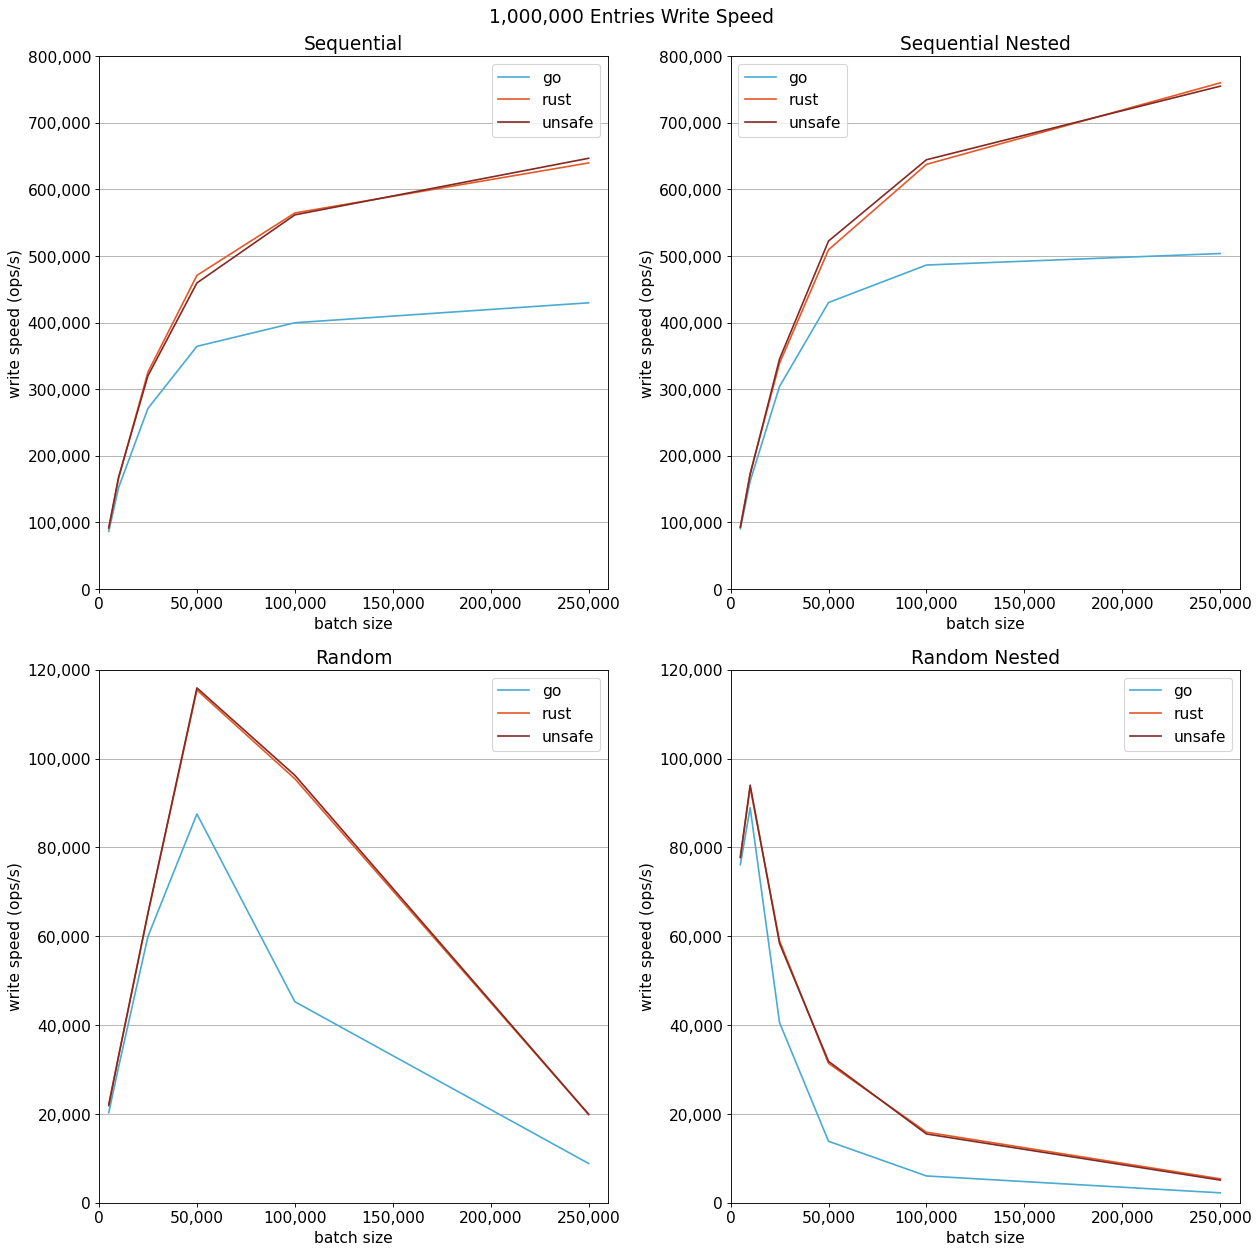

In [ ]:
plt.rcParams["font.size"] = "14"
fig = plt.figure(figsize=(16,16), dpi=80)
fig.suptitle('1,000,000 Entries Write Speed')
ax = fig.add_subplot(221)
grouped=c1m[c1m['write_alg']=='seq'].groupby(["runtime","batch"])["write_ops/s"].mean()
grouped['go'].plot(label='go',color=COLOR_GO)
grouped['release'].plot(label='rust',color=COLOR_RUST)
grouped['unsafe'].plot(label='unsafe',color=COLOR_UNSAFE)
plt.ylabel('write speed (ops/s)')
plt.xlabel('batch size')
plt.title('Sequential')
plt.legend()
ax.grid(axis='y')
ax.set_ylim([0,800000])
ax.yaxis.set_major_formatter(ticks_comma)
ax.set_xlim([0,260000])
ax.xaxis.set_major_formatter(ticks_comma)
ax = fig.add_subplot(222)
grouped=c1m[c1m['write_alg']=='seq-nest'].groupby(["runtime","batch"])["write_ops/s"].mean()
grouped['go'].plot(label='go',color=COLOR_GO)
grouped['release'].plot(label='rust',color=COLOR_RUST)
grouped['unsafe'].plot(label='unsafe',color=COLOR_UNSAFE)
plt.ylabel('write speed (ops/s)')
plt.xlabel('batch size')
plt.title('Sequential Nested')
plt.legend()
ax.grid(axis='y'); 
ax.set_ylim([0,800000])
ax.yaxis.set_major_formatter(ticks_comma)
ax.set_xlim([0,260000])
ax.xaxis.set_major_formatter(ticks_comma)
ax = fig.add_subplot(223)
grouped=c1m[c1m['write_alg']=='rnd'].groupby(["runtime","batch"])["write_ops/s"].mean()
grouped['go'].plot(label='go',color=COLOR_GO)
grouped['release'].plot(label='rust',color=COLOR_RUST)
grouped['unsafe'].plot(label='unsafe',color=COLOR_UNSAFE)
plt.ylabel('write speed (ops/s)')
plt.xlabel('batch size')
plt.title('Random')
plt.legend()
ax.grid(axis='y');
ax.set_ylim([0,120000])
ax.yaxis.set_major_formatter(ticks_comma)
ax.set_xlim([0,260000])
ax.xaxis.set_major_formatter(ticks_comma)
ax = fig.add_subplot(224)
grouped=c1m[c1m['write_alg']=='rnd-nest'].groupby(["runtime","batch"])["write_ops/s"].mean()
grouped['go'].plot(label='go',color=COLOR_GO)
grouped['release'].plot(label='rust',color=COLOR_RUST)
grouped['unsafe'].plot(label='unsafe',color=COLOR_UNSAFE)
plt.ylabel('write speed (ops/s)')
plt.xlabel('batch size')
plt.title('Random Nested')
plt.legend()
ax.grid(axis='y'); 
ax.set_ylim([0,120000])
ax.yaxis.set_major_formatter(ticks_comma)
ax.set_xlim([0,260000])
ax.xaxis.set_major_formatter(ticks_comma)
fig.tight_layout()
plt.show()

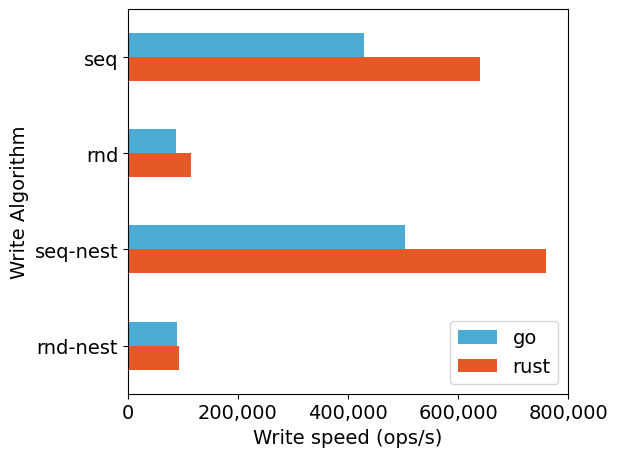

In [ ]:
alg = list()
batch_size = list()
release = list()
go = list()

for write_alg in set(c1m['write_alg']):
    g=c1m[c1m['write_alg']==write_alg].groupby(["runtime","batch"])["write_ops/s"].mean()
    maxed=g['go'].idxmax()
    alg.append(write_alg)
    batch_size.append(maxed)
    release.append(g['release'][maxed])
    go.append(g['go'][maxed])

d = {
    'write_alg': alg,
    'go': go,
    'rust': release,
}

ax = pd.DataFrame(data=d).plot.barh(x='write_alg',color=BAR_COLORS)
ax.xaxis.set_major_formatter(ticks_comma)
ax.invert_yaxis()
ax.set_xlabel('Write speed (ops/s)')
ax.set_xticks([0,200000,400000,600000,800000])
ax.set_ylabel('Write Algorithm')
plt.tight_layout()
plt.show()

In [ ]:
c1m.groupby(["write_alg","read_alg","runtime","batch"])["read_ops/s"].mean()

write_alg  read_alg  runtime  batch 
rnd        rnd       go       5000        613588.4
                              10000       650055.6
                              25000       678382.8
                              50000       679025.0
                              100000      645997.8
                              250000      653863.0
                     release  5000       1147609.8
                              10000      1139221.6
                              25000      1157420.8
                              50000      1165796.8
                              100000     1161189.6
                              250000     1169617.8
                     unsafe   5000       1148688.6
                              10000      1138074.6
                              25000      1159254.0
                              50000      1175679.2
                              100000     1166933.8
                              250000     1162609.2
           seq       go       5000      50000

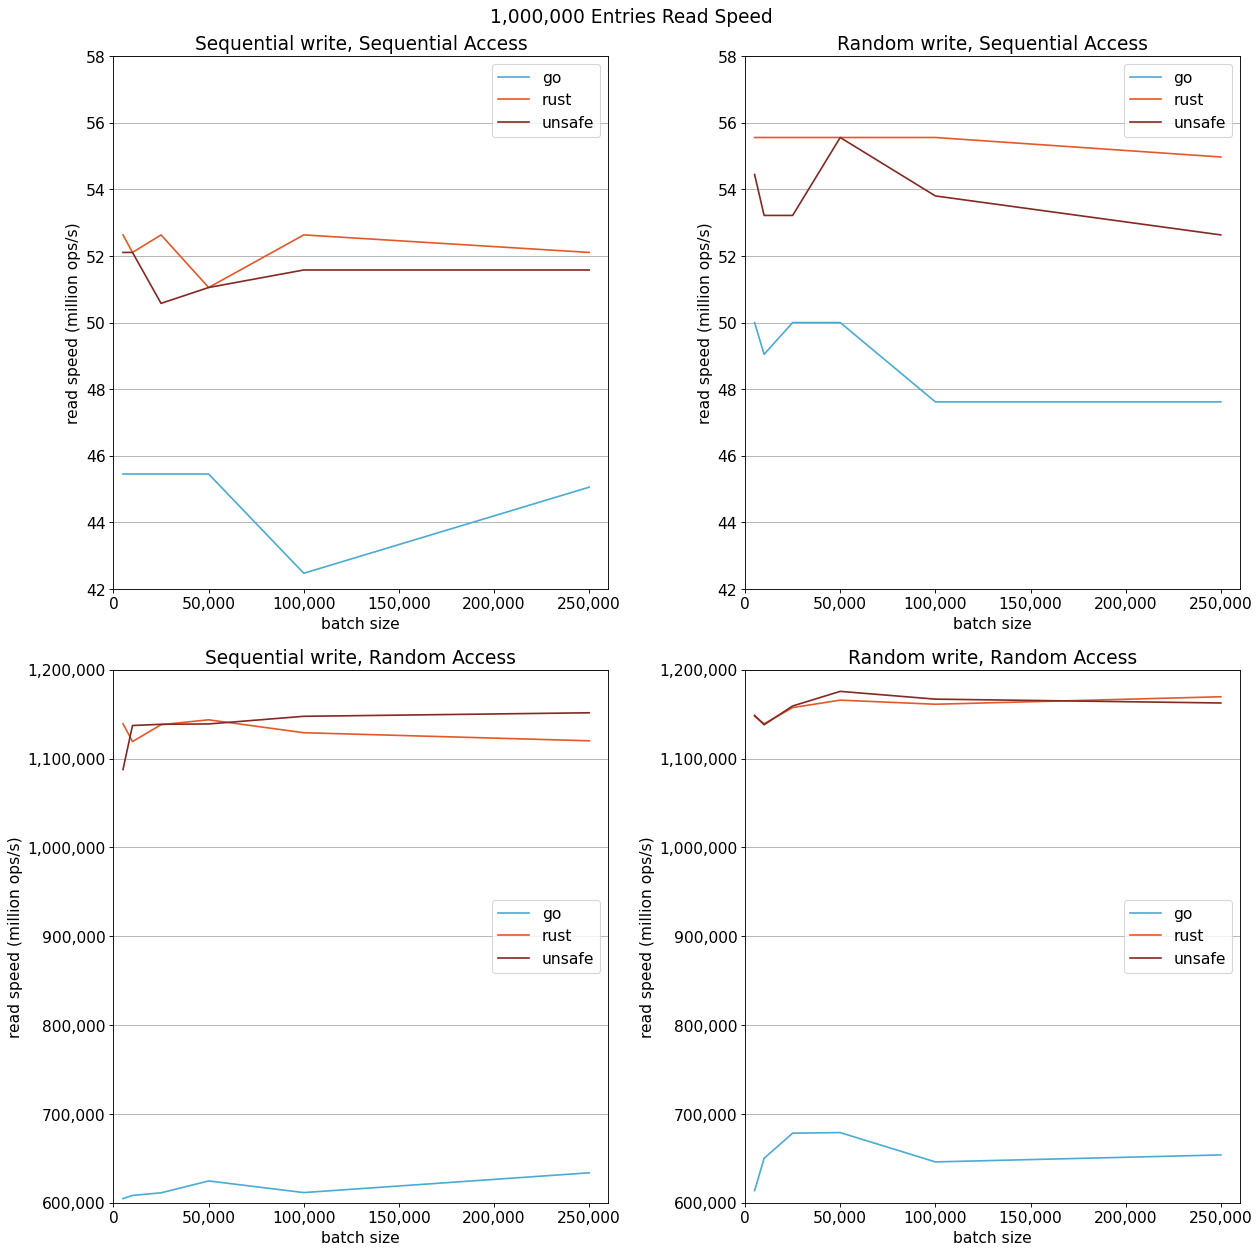

In [ ]:
groups=c1m.groupby(["write_alg","read_alg","runtime","batch"])["read_ops/s"].mean()
plt.rcParams["font.size"] = "14"
fig = plt.figure(figsize=(16,16), dpi=80)
fig.suptitle('1,000,000 Entries Read Speed')
ax = fig.add_subplot(221)
grouped=groups['seq']['seq']
grouped['go'].plot(label='go',color=COLOR_GO)
grouped['release'].plot(label='rust',color=COLOR_RUST)
grouped['unsafe'].plot(label='unsafe',color=COLOR_UNSAFE)
plt.ylabel('read speed (million ops/s)')
ax.ticklabel_format(axis='y', style='plain')
plt.xlabel('batch size')
plt.title('Sequential write, Sequential Access')
plt.legend()
ax.grid(axis='y')
ax.yaxis.set_major_formatter(ticks_million)
ax.set_ylim([42000000,58000000])
ax.xaxis.set_major_formatter(ticks_comma)
ax.set_xlim([0,260000])
ax = fig.add_subplot(222)
grouped=groups['rnd']['seq']
grouped['go'].plot(label='go',color=COLOR_GO)
grouped['release'].plot(label='rust',color=COLOR_RUST)
grouped['unsafe'].plot(label='unsafe',color=COLOR_UNSAFE)
plt.ylabel('read speed (million ops/s)')
ax.ticklabel_format(axis='y', style='plain')
plt.xlabel('batch size')
plt.title('Random write, Sequential Access')
plt.legend()
ax.grid(axis='y')
ax.yaxis.set_major_formatter(ticks_million)
ax.set_ylim([42000000,58000000])
ax.xaxis.set_major_formatter(ticks_comma)
ax.set_xlim([0,260000])
ax = fig.add_subplot(223)
grouped=groups['seq']['rnd']
grouped['go'].plot(label='go',color=COLOR_GO)
grouped['release'].plot(label='rust',color=COLOR_RUST)
grouped['unsafe'].plot(label='unsafe',color=COLOR_UNSAFE)
plt.ylabel('read speed (million ops/s)')
plt.xlabel('batch size')
plt.title('Sequential write, Random Access')
plt.legend()
ax.grid(axis='y')
ax.yaxis.set_major_formatter(ticks_comma)
ax.set_ylim([600000,1200000])
ax.xaxis.set_major_formatter(ticks_comma)
ax.set_xlim([0,260000])
ax = fig.add_subplot(224)
grouped=groups['rnd']['rnd']
grouped['go'].plot(label='go',color=COLOR_GO)
grouped['release'].plot(label='rust',color=COLOR_RUST)
grouped['unsafe'].plot(label='unsafe',color=COLOR_UNSAFE)
plt.ylabel('read speed (million ops/s)')
ax.ticklabel_format(axis='y', style='plain')
plt.xlabel('batch size')
plt.title('Random write, Random Access')
plt.legend()
ax.grid(axis='y')
ax.yaxis.set_major_formatter(ticks_comma)
ax.set_ylim([600000,1200000])
ax.xaxis.set_major_formatter(ticks_comma)
ax.set_xlim([0,260000])
fig.tight_layout()
plt.show()

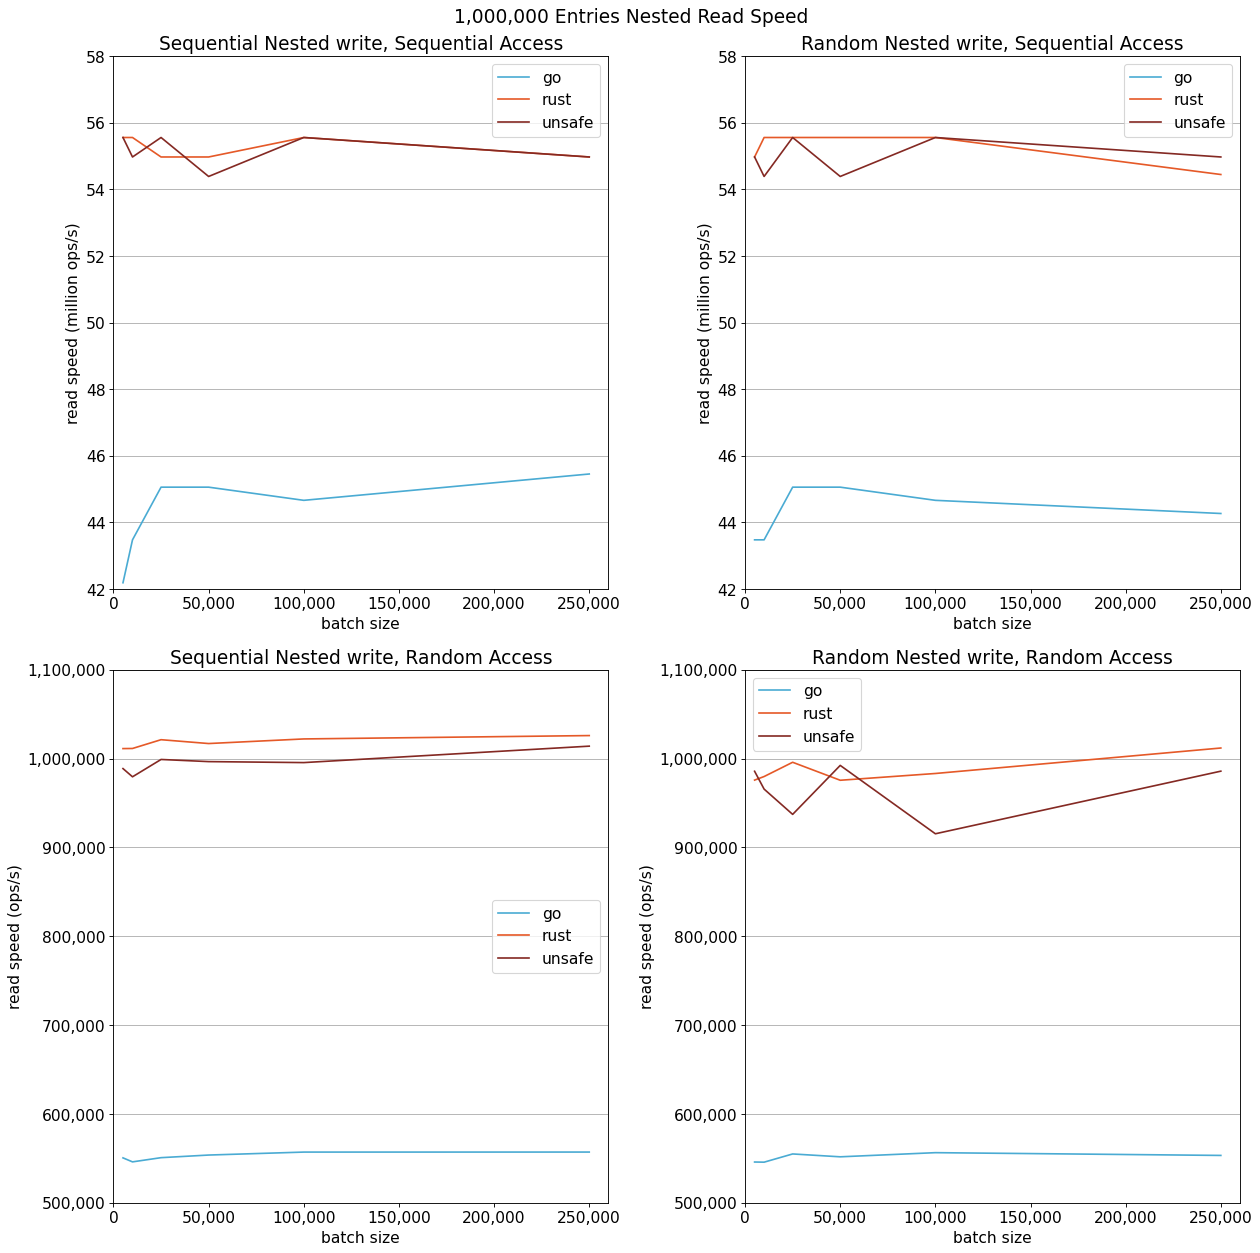

In [ ]:
groups=c1m.groupby(["write_alg","read_alg","runtime","batch"])["read_ops/s"].mean()
plt.rcParams["font.size"] = "14"
fig = plt.figure(figsize=(16,16), dpi=80)
fig.suptitle('1,000,000 Entries Nested Read Speed')
ax = fig.add_subplot(221)
grouped=groups['seq-nest']['seq']
grouped['go'].plot(label='go',color=COLOR_GO)
grouped['release'].plot(label='rust',color=COLOR_RUST)
grouped['unsafe'].plot(label='unsafe',color=COLOR_UNSAFE)
plt.ylabel('read speed (million ops/s)')
ax.ticklabel_format(axis='y', style='plain')
plt.xlabel('batch size')
plt.title('Sequential Nested write, Sequential Access')
plt.legend()
ax.grid(axis='y')
ax.yaxis.set_major_formatter(ticks_million)
ax.set_ylim([42000000,58000000])
ax.xaxis.set_major_formatter(ticks_comma)
ax.set_xlim([0,260000])
ax = fig.add_subplot(222)
grouped=groups['rnd-nest']['seq']
grouped['go'].plot(label='go',color=COLOR_GO)
grouped['release'].plot(label='rust',color=COLOR_RUST)
grouped['unsafe'].plot(label='unsafe',color=COLOR_UNSAFE)
plt.ylabel('read speed (million ops/s)')
ax.ticklabel_format(axis='y', style='plain')
plt.xlabel('batch size')
plt.title('Random Nested write, Sequential Access')
plt.legend()
ax.grid(axis='y')
ax.yaxis.set_major_formatter(ticks_million)
ax.set_ylim([42000000,58000000])
ax.xaxis.set_major_formatter(ticks_comma)
ax.set_xlim([0,260000])
ax = fig.add_subplot(223)
grouped=groups['seq-nest']['rnd']
grouped['go'].plot(label='go',color=COLOR_GO)
grouped['release'].plot(label='rust',color=COLOR_RUST)
grouped['unsafe'].plot(label='unsafe',color=COLOR_UNSAFE)
plt.ylabel('read speed (ops/s)')
ax.ticklabel_format(axis='y', style='plain')
plt.xlabel('batch size')
plt.title('Sequential Nested write, Random Access')
plt.legend()
ax.grid(axis='y')
ax.yaxis.set_major_formatter(ticks_comma)
ax.set_ylim([500000,1100000])
ax.xaxis.set_major_formatter(ticks_comma)
ax.set_xlim([0,260000])
ax = fig.add_subplot(224)
grouped=groups['rnd-nest']['rnd']
grouped['go'].plot(label='go',color=COLOR_GO)
grouped['release'].plot(label='rust',color=COLOR_RUST)
grouped['unsafe'].plot(label='unsafe',color=COLOR_UNSAFE)
plt.ylabel('read speed (ops/s)')
ax.ticklabel_format(axis='y', style='plain')
plt.xlabel('batch size')
plt.title('Random Nested write, Random Access')
plt.legend()
ax.grid(axis='y')
ax.yaxis.set_major_formatter(ticks_comma)
ax.set_ylim([500000,1100000])
ax.xaxis.set_major_formatter(ticks_comma)
ax.set_xlim([0,260000])
fig.tight_layout()
plt.show()

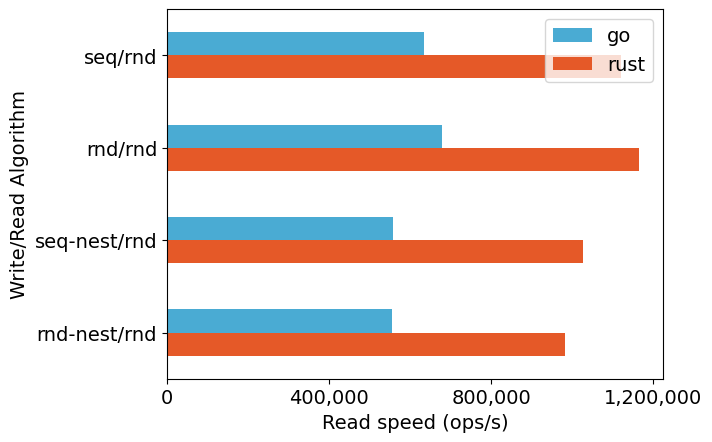

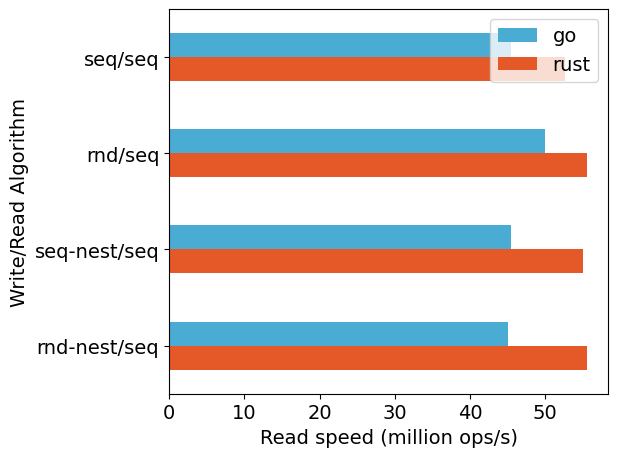

In [ ]:
alg = list()
batch_size = list()
release = list()
go = list()

for write_alg in set(c1m['write_alg']):
    for read_alg in set(c1m['read_alg']):
        g=c1m[c1m['write_alg']==write_alg].groupby(["read_alg","runtime","batch"])["read_ops/s"].mean()
        r = maxed=g[read_alg]
        maxed=r['go'].idxmax()
        alg.append(write_alg + '/' + read_alg)
        batch_size.append(maxed)
        release.append(r['release'][maxed])
        go.append(r['go'][maxed])

d = {
    'alg': alg,
    'go': go,
    'rust': release,
}
pd_rnd=pd.DataFrame(data=d)
ax = pd_rnd[pd_rnd['alg'].str.endswith('rnd')].plot.barh(x='alg',color=[COLOR_GO,COLOR_RUST])
ax.xaxis.set_major_formatter(ticks_comma)
ax.invert_yaxis()
ax.set_xlabel('Read speed (ops/s)')
ax.set_xticks([0,400000,800000,1200000])
ax.set_ylabel('Write/Read Algorithm')
ax = pd_rnd[pd_rnd['alg'].str.endswith('seq')].plot.barh(x='alg',color=[COLOR_GO,COLOR_RUST])
ax.xaxis.set_major_formatter(ticks_million)
ax.invert_yaxis()
ax.set_xlabel('Read speed (million ops/s)')
ax.set_ylabel('Write/Read Algorithm')
plt.tight_layout()
plt.show()